In [25]:
#imports
import pandas as pd
import wbdata
from pprint import pprint
import requests
import wbpy
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

c_api = wbpy.ClimateAPI()
#setting list of countries
countries_l = ["Aruba",
"Andorra",
"United Arab Emirates",
"Argentina",
"Antigua and Barbuda",
"Australia",
"Austria",
"Belgium",
"Bahrain",
"Bahamas, The",
"Bermuda",
"Barbados",
"Brunei Darussalam",
#"Canada",
"Switzerland",
"Chile",
#"Curacao",
"Cayman Islands",
"Cyprus",
"Czech Republic",
"Germany",
"Denmark",
"Spain",
"Estonia",
"Finland",
"France",
"Faroe Islands",
"United Kingdom",
"Gibraltar",
"Greece",
"Greenland",
"Guam",
"Hong Kong SAR, China",
"Croatia",
"Hungary",
"Isle of Man",
"Ireland",
"Iceland",
"Israel",
"Italy",
"Japan",
"St. Kitts and Nevis",
"Korea, Rep.",
"Kuwait",
"Liechtenstein",
"Lithuania",
"Luxembourg",
"Latvia",
"Macao SAR, China",
#"St. Martin (French part)",
"Monaco",
"Malta",
"Northern Mariana Islands",
"New Caledonia",
"Netherlands",
"Norway",
"New Zealand",
"Oman",
"Panama",
"Palau",
"Poland",
"Puerto Rico",
"Portugal",
"French Polynesia",
"Qatar",
"Saudi Arabia",
"Singapore",
"San Marino",
"Slovak Republic",
"Slovenia",
"Sweden",
#"Sint Maarten (Dutch part)",
"Seychelles",
"Turks and Caicos Islands",
"Trinidad and Tobago",
"Taiwan, China",
"Uruguay",
"United States",
"British Virgin Islands",
"Virgin Islands (U.S.)"]


In [4]:
#putting list of iso codes and commenting out those without data
iso_and_basin_codes = ['ABW',
 'AND',
 'ARE',
 'ARG',
 'ATG',
 'AUS',
 'AUT',
 'BEL',
 'BHR',
 'BHS',
 'BMU',
 'BRB',
 'BRN',
# 'CAN',
 'CHE',
# 'CHI',
 'CHL',
 #'CUW',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DNK',
 'ESP',
 'EST',
 'FIN',
 'FRA',
 'FRO',
 'GBR',
 'GIB',
 'GRC',
 'GRL',
 'GUM',
 'HKG',
 'HRV',
 'HUN',
 'IMN',
 'IRL',
 'ISL',
 'ISR',
 'ITA',
 'JPN',
 'KNA',
 'KOR',
 'KWT',
 'LIE',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 #'MAF',
 'MCO',
 'MLT',
 'MNP',
 'NCL',
 'NLD',
 'NOR',
 'NZL',
 'OMN',
 'PAN',
 'PLW',
 'POL',
 'PRI',
 'PRT',
 'PYF',
 'QAT',
 'SAU',
 'SGP',
 'SMR',
 'SVK',
 'SVN',
 'SWE',
 #'SXM',
 'SYC',
 'TCA',
 'TTO',
 'TWN',
 'URY',
 'USA',
 'VGB',
 'VIR']

In [5]:
#pulling the data and converting it to dictionary
dataset_temp = c_api.get_instrumental(data_type="tas", interval="year", locations=iso_and_basin_codes)
temp_dict = dataset_temp.as_dict()
temp_dict

{'ABW': {'1901': 27.633335,
  '1902': 27.491665,
  '1903': 27.608334,
  '1904': 27.375,
  '1905': 27.525,
  '1906': 27.483334,
  '1907': 27.375,
  '1908': 27.55,
  '1909': 27.375,
  '1910': 27.4,
  '1911': 27.45,
  '1912': 27.591665,
  '1913': 27.291666,
  '1914': 27.391666,
  '1915': 28.133335,
  '1916': 27.666666,
  '1917': 27.258335,
  '1918': 27.2,
  '1919': 27.375,
  '1920': 27.408335,
  '1921': 27.166666,
  '1922': 27.033335,
  '1923': 27.225,
  '1924': 27.616665,
  '1925': 27.341665,
  '1926': 27.866665,
  '1927': 27.158335,
  '1928': 27.433334,
  '1929': 27.441666,
  '1930': 27.441666,
  '1931': 27.891666,
  '1932': 27.616665,
  '1933': 28.366665,
  '1934': 28.375,
  '1935': 28.175,
  '1936': 28.325,
  '1937': 27.958334,
  '1938': 27.816666,
  '1939': 27.95,
  '1940': 28.666666,
  '1941': 28.85,
  '1942': 28.4,
  '1943': 28.175,
  '1944': 27.891666,
  '1945': 27.625,
  '1946': 27.741665,
  '1947': 28.375,
  '1948': 27.65,
  '1949': 27.25,
  '1950': 27.05,
  '1951': 27.925,
  '1

In [6]:
#making list that will populate dataframe
year = ["1995", "2000", "2005", "2009"]
temp = []
probyear = []
for i in iso_and_basin_codes:
    for y in year:
        temp.append(temp_dict[i][y])
temp

[28.608334,
 28.258335,
 28.0,
 28.275,
 9.433333,
 9.460417,
 8.710417,
 9.627084,
 26.997562,
 27.562805,
 27.262806,
 27.643091,
 14.012433,
 13.560453,
 14.040006,
 14.451981,
 26.9625,
 26.7875,
 26.720835,
 26.320835,
 21.480915,
 21.24332,
 22.352182,
 21.92194,
 6.8737564,
 8.014925,
 6.439801,
 7.478607,
 10.541358,
 10.900618,
 10.618827,
 10.616358,
 27.122915,
 27.858334,
 27.535416,
 28.48125,
 25.411518,
 25.144608,
 25.582844,
 25.7875,
 21.625,
 21.4,
 21.416668,
 21.45,
 26.620834,
 26.25,
 27.3375,
 26.725,
 26.183334,
 26.386906,
 26.390476,
 26.338095,
 6.414693,
 7.233114,
 6.2776318,
 6.8809214,
 7.9698286,
 7.735063,
 8.052638,
 8.097851,
 27.65,
 27.475,
 27.533335,
 27.325,
 18.835001,
 19.403334,
 19.386667,
 19.735834,
 8.228611,
 9.492361,
 8.024167,
 8.8475,
 9.095997,
 10.041376,
 9.148071,
 9.445124,
 8.386667,
 9.023939,
 8.720606,
 8.902425,
 14.865692,
 14.391164,
 14.248523,
 14.812146,
 6.3325,
 7.170333,
 6.267333,
 6.1801667,
 2.1345768,
 3.2470634

In [7]:
#making a multilayerd index
iterables = [countries_l, year]
index = pd.MultiIndex.from_product(iterables, names=['country', 'date'])
#making the Temp dataframe
Temp_df = pd.DataFrame(temp, index=index)
Temp_df = Temp_df.rename(columns={Temp_df.columns[0]:"Temperture in C"})

In [8]:
#making the resources dataframe
countries = [i['id'] for i in wbdata.get_country(incomelevel="HIC", display=False)]
indicators = {"NW.NCA.TO": "Natural Capital","NW.NCA.AGRI.PC": "Agricutural Land per Capital","NW.TOW.PC": "Wealth per Capita"}
df_Nat_Cap = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
df_Nat_Cap.head()

Natural Capital  Agricutural Land per Capital  \
country              date                                                  
United Arab Emirates 2014     2.357202e+12                   1818.430457   
                     2010     1.950883e+12                   1868.955312   
                     2005     1.255220e+12                   2805.459285   
                     2000     8.018936e+11                   4781.142929   
                     1995     7.165219e+11                   4363.626269   

                           Wealth per Capita  
country              date                     
United Arab Emirates 2014       7.382704e+05  
                     2010       6.728036e+05  
                     2005       9.929800e+05  
                     2000       1.196284e+06  
                     1995       1.296028e+06

In [9]:
#changing 2009 to 2010
Temp_alt_df = Temp_df.reset_index()
for c in range(len(Temp_alt_df["country"])):
    if Temp_alt_df.loc[c,'date'] == "2009":
        Temp_alt_df.loc[c,'date'] = "2010"
Temp_alt_df = Temp_alt_df.set_index(["country","date"])
Temp_alt_df

Temperture in C
country                  date                 
Aruba                    1995        28.608334
                         2000        28.258335
                         2005        28.000000
                         2010        28.275000
Andorra                  1995         9.433333
                         2000         9.460417
                         2005         8.710417
                         2010         9.627084
United Arab Emirates     1995        26.997562
                         2000        27.562805
                         2005        27.262806
                         2010        27.643091
Argentina                1995        14.012433
                         2000        13.560453
                         2005        14.040006
                         2010        14.451981
Antigua and Barbuda      1995        26.962500
                         2000        26.787500
                         2005        26.720835
                         2010        26.320835
Australia                1995        21.480915
                         2000        21.243320
                         2005        22.352182
                         2010        21.921940
Austria                  1995         6.873756
                         2000         8.014925
                         2005         6.439801
                         2010         7.478607
Belgium                  1995        10.541358
                         2000        10.900618
...                                        ...
Seychelles               2005        27.297222
                         2010        27.413889
Turks and Caicos Islands 1995        26.366665
                         2000        26.075000
                         2005        26.358334
                         2010        26.620834
Trinidad and Tobago      1995        26.641666
                         2000        26.325000
                         2005        26.776667
                         2010        26.825000
Taiwan, China            1995        19.774652
                         2000        20.339237
                         2005        20.211458
                         2010        20.528126
Uruguay                  1995        17.582867
                         2000        17.736797
                         2005        18.054028
                         2010        17.955524
United States            1995         7.419545
                         2000         7.431657
                         2005         7.857778
                         2010         7.102065
British Virgin Islands   1995        26.275000
                         2000        25.541668
                         2005        25.841665
                         2010        25.941666
Virgin Islands (U.S.)    1995        26.458334
                         2000        25.741665
                         2005        26.008335
                         2010        26.075000

[304 rows x 1 columns]

In [10]:
#leaving out 2014
Resources_df = df_Nat_Cap.reset_index()
Resources_df = Resources_df[Resources_df['date'] != '2014']
Resources_df = Resources_df.set_index(["country", "date"])
Resources_df.head()

Natural Capital  Agricutural Land per Capital  \
country              date                                                  
United Arab Emirates 2010     1.950883e+12                   1868.955312   
                     2005     1.255220e+12                   2805.459285   
                     2000     8.018936e+11                   4781.142929   
                     1995     7.165219e+11                   4363.626269   
Argentina            2010     7.516620e+11                   9980.751465   

                           Wealth per Capita  
country              date                     
United Arab Emirates 2010       6.728036e+05  
                     2005       9.929800e+05  
                     2000       1.196284e+06  
                     1995       1.296028e+06  
Argentina            2010       1.263288e+05

In [11]:
#merging dataframes
combined_df = Temp_alt_df.join(Resources_df, how='inner')
combined_df.head()

Temperture in C  Natural Capital  \
country   date                                     
Argentina 1995        14.012433     3.568115e+11   
          2000        13.560453     3.882977e+11   
          2005        14.040006     6.468200e+11   
          2010        14.451981     7.516620e+11   
Australia 1995        21.480915     1.798999e+12   

                Agricutural Land per Capital  Wealth per Capita  
country   date                                                   
Argentina 1995                   5758.312255      101364.379755  
          2000                   5810.929061      116973.340999  
          2005                   9950.871248      108954.015777  
          2010                   9980.751465      126328.788468  
Australia 1995                  14840.028438      688270.627163

In [12]:
combined1_df = combined_df.reset_index()
combined1_df.head()


country  date  Temperture in C  Natural Capital  \
0  Argentina  1995        14.012433     3.568115e+11   
1  Argentina  2000        13.560453     3.882977e+11   
2  Argentina  2005        14.040006     6.468200e+11   
3  Argentina  2010        14.451981     7.516620e+11   
4  Australia  1995        21.480915     1.798999e+12   

   Agricutural Land per Capital  Wealth per Capita  
0                   5758.312255      101364.379755  
1                   5810.929061      116973.340999  
2                   9950.871248      108954.015777  
3                   9980.751465      126328.788468  
4                  14840.028438      688270.627163

In [13]:
#combined1_df.groupby('country').plot(x='date', y='Temperture in C')
#combined1_df.head()

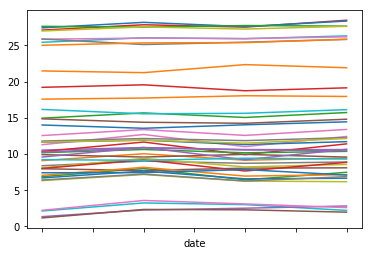

In [14]:
fig, ax = plt.subplots()
combined1_df.groupby('country').plot(x='date', y='Temperture in C', ax=ax, legend=False)
plt.show()

In [15]:
#combined1_df.groupby('country').plot(x='date', y='Natural Capital')
#combined1_df.head()

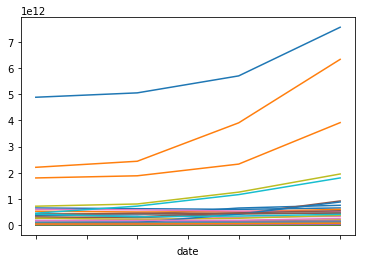

In [16]:
fig, ax = plt.subplots()
combined1_df.groupby('country').plot(x='date', y='Natural Capital', ax=ax, legend=False)
plt.show()

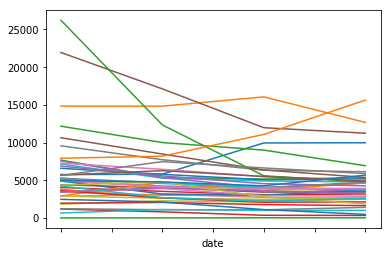

In [17]:
fig, ax = plt.subplots()
combined1_df.groupby('country').plot(x='date', y='Agricutural Land per Capital', ax=ax, legend=False)
plt.show()

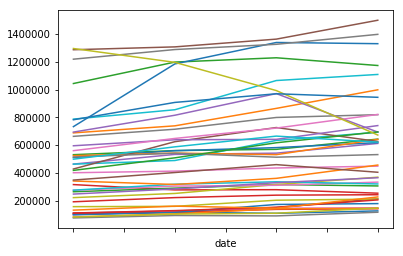

In [18]:
fig, ax = plt.subplots()
combined1_df.groupby('country').plot(x='date', y='Wealth per Capita', ax=ax, legend=False)
plt.show()

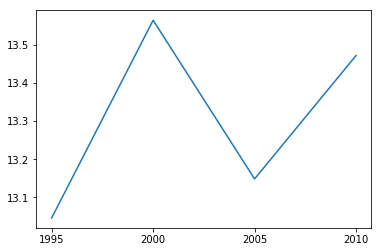

In [26]:
world_temp= combined1_df.groupby(["date"]).mean()
world_temp = world_temp.reset_index()
date_x = world_temp['date']
temp_z = world_temp["Temperture in C"]
mylabel = "Average Developed Countries"
plt.plot(date_x, temp_z, label=mylabel)



Text(0.5,1,'Austria')

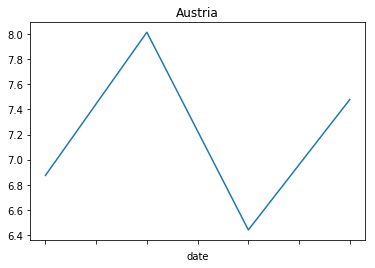

In [14]:
fig, ax = plt.subplots()
combined1_df[combined1_df['country'] == 'Austria'].plot(x='date', y='Temperture in C', ax=ax, legend=False)
ax.set_title("Austria")

Text(0.5,1,'Austria and Argentina')

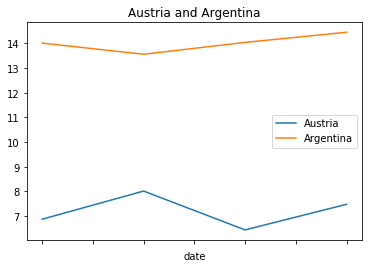

In [15]:
# One subplot again
fig, ax = plt.subplots()

# Use ax for both
combined1_df[combined1_df['country'] == 'Austria'].plot(x='date', y='Temperture in C', ax=ax, label='Austria')
combined1_df[combined1_df['country'] == 'Argentina'].plot(x='date', y='Temperture in C', ax=ax, label='Argentina')
ax.set_title("Austria and Argentina")

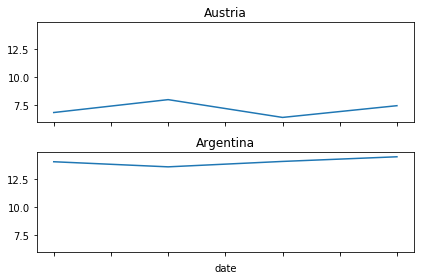

In [29]:
# Asking for TWO subplots, ax1 and ax2.
# Be sure to put them in parenthesis
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

# Use ax1 to plot Bhutan
combined1_df[combined1_df['country'] == 'Austria'].plot(x='date', y='Temperture in C', legend=False, ax=ax1)
ax1.set_title("Austria")

# Use ax2 to plot Iran
combined1_df[combined1_df['country'] == 'Argentina'].plot(x='date', y='Temperture in C', legend=False, ax=ax2)
ax2.set_title("Argentina")

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()

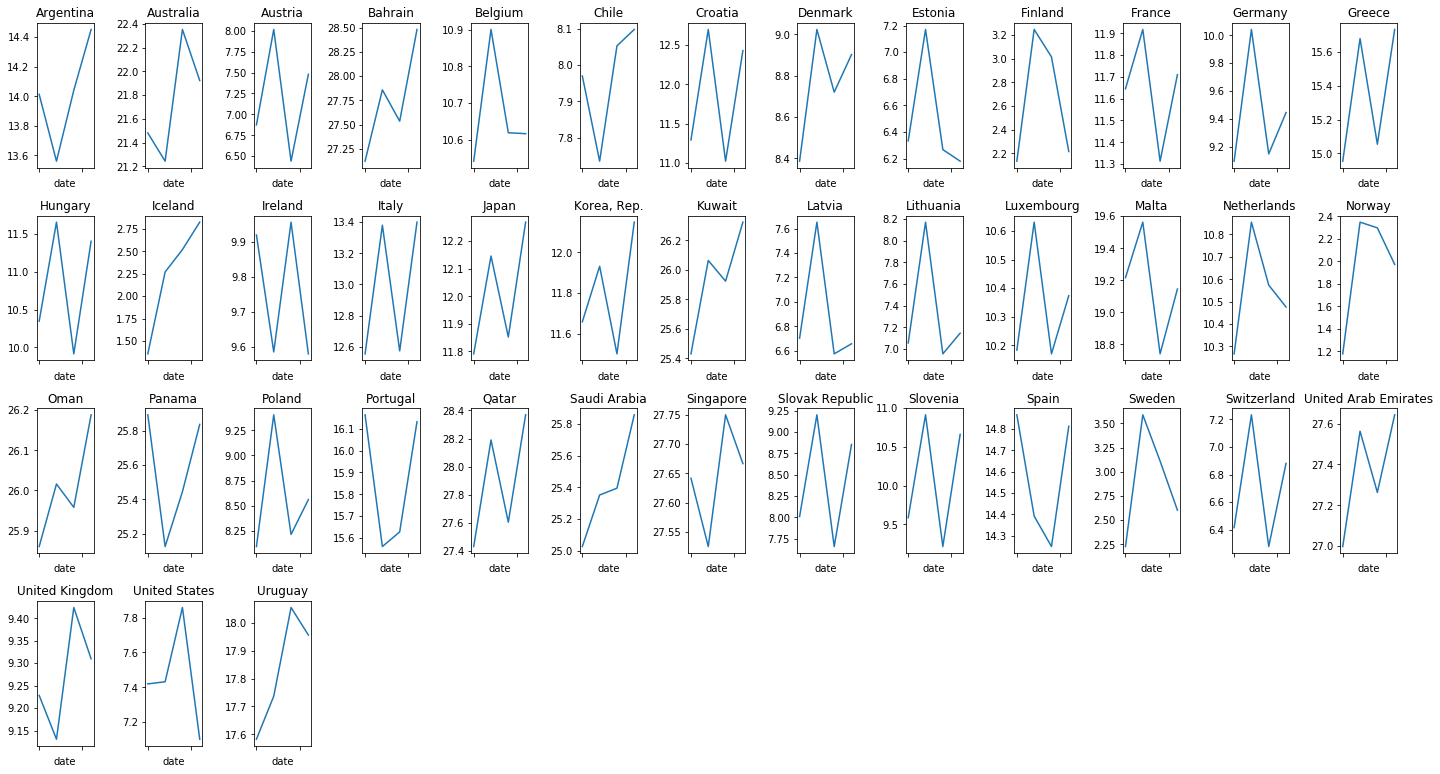

In [30]:
# Make the graph 20 inches by 40 inches
plt.figure(figsize=(20,40), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1
for countryname, selection in combined1_df.groupby("country"):
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(15, 13, plot_number)
    selection.plot(x='date', y='Temperture in C', ax=ax, label=countryname, legend=False)
    ax.set_title(countryname)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()


In [55]:
#fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
#axes

In [56]:
#[item for sublist in axes for item in sublist] 

In [57]:
#axes_list = [item for sublist in axes for item in sublist] 

IndexError: pop from empty list

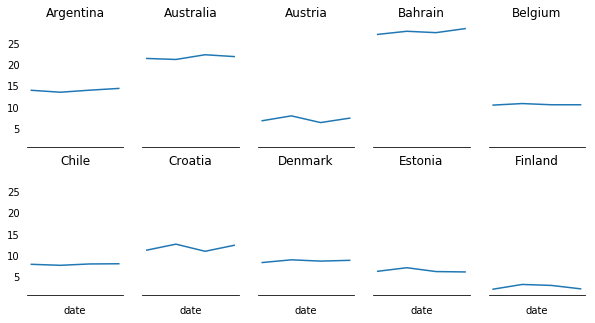

In [67]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10,5))
axes_list = [item for sublist in axes for item in sublist] 

for countryname, selection in combined1_df.head(1400).groupby("country"):
    ax = axes_list.pop(0)
    selection.plot(x='date', y='Temperture in C', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        right=False,
        top=False
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


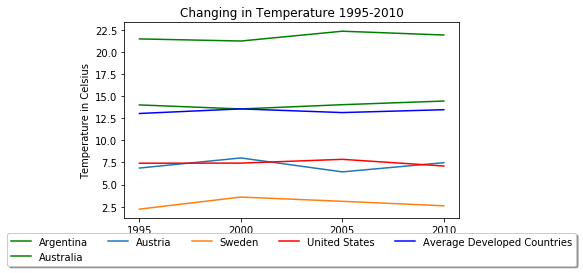

In [36]:
argentina = combined1_df.loc[combined1_df["country"] == "Argentina"]
date_x = argentina["date"]
temp_z = argentina["Temperture in C"]
mylabel = "Argentina"
plt.plot(date_x, temp_z, color="green", label=mylabel)

australia = combined1_df.loc[combined1_df["country"] == "Australia"]
date_x = australia["date"]
temp_z = australia["Temperture in C"]
mylabel = "Australia"
plt.plot(date_x, temp_z, color="green", label=mylabel)


austria = combined1_df.loc[combined1_df["country"] == "Austria"]
date_x = austria["date"]
temp_z = austria["Temperture in C"]
mylabel = "Austria"
plt.plot(date_x, temp_z, label=mylabel)

sweden = combined1_df.loc[combined1_df["country"] == "Sweden"]
date_x = sweden["date"]
temp_z = sweden["Temperture in C"]
mylabel = "Sweden"
plt.plot(date_x, temp_z, label=mylabel)

usa = combined1_df.loc[combined1_df["country"] == "United States"]
date_x = usa["date"]
temp_z = usa["Temperture in C"]
mylabel = "United States"
plt.plot(date_x, temp_z, color= 'red', label=mylabel)

world_temp= combined1_df.groupby(["date"]).mean()
world_temp = world_temp.reset_index()
date_x = world_temp['date']
temp_z = world_temp["Temperture in C"]
mylabel = "Average Developed Countries"
plt.plot(date_x, temp_z, color="blue", label=mylabel)

#plt.legend(loc="best")
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.savefig("temp.png")
plt.title("Changing in Temperature 1995-2010")
plt.xlabel("Years")
plt.ylabel("Temperature in Celsius")
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


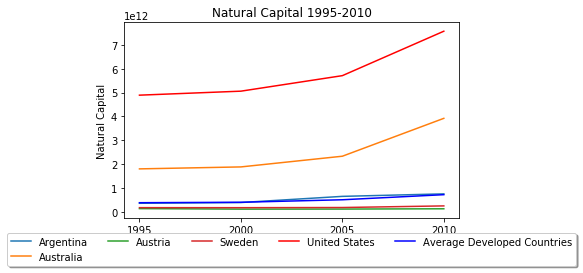

In [73]:
argentina = combined1_df.loc[combined1_df["country"] == "Argentina"]
date_x = argentina["date"]
temp_z = argentina["Natural Capital"]
mylabel = "Argentina"
plt.plot(date_x, temp_z, label=mylabel)

australia = combined1_df.loc[combined1_df["country"] == "Australia"]
date_x = australia["date"]
temp_z = australia["Natural Capital"]
mylabel = "Australia"
plt.plot(date_x, temp_z, label=mylabel)

austria = combined1_df.loc[combined1_df["country"] == "Austria"]
date_x = austria["date"]

temp_z = austria["Natural Capital"]
mylabel = "Austria"
plt.plot(date_x, temp_z, label=mylabel)

sweden = combined1_df.loc[combined1_df["country"] == "Sweden"]
date_x = sweden["date"]
temp_z = sweden["Natural Capital"]
mylabel = "Sweden"
plt.plot(date_x, temp_z, label=mylabel)

usa = combined1_df.loc[combined1_df["country"] == "United States"]
date_x = usa["date"]
temp_z = usa["Natural Capital"]
mylabel = "United States"
plt.plot(date_x, temp_z, color= 'red', label=mylabel)

world_temp= combined1_df.groupby(["date"]).mean()
world_temp = world_temp.reset_index()
date_x = world_temp['date']
temp_z = world_temp["Natural Capital"]
mylabel = "Average Developed Countries"
plt.plot(date_x, temp_z, color="blue", label=mylabel)

#plt.legend(loc="best")
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.savefig("temp.png")
plt.title("Natural Capital 1995-2010")
plt.xlabel("Years")
plt.ylabel("Natural Capital")
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


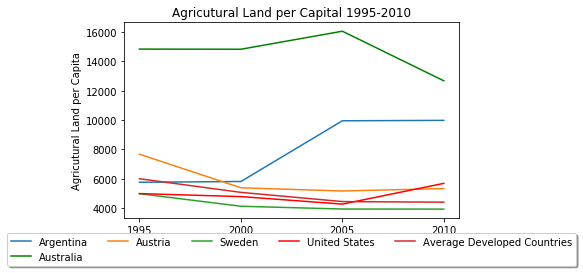

In [74]:
argentina = combined1_df.loc[combined1_df["country"] == "Argentina"]
date_x = argentina["date"]
temp_z = argentina["Agricutural Land per Capital"]
mylabel = "Argentina"
plt.plot(date_x, temp_z, label=mylabel)

australia = combined1_df.loc[combined1_df["country"] == "Australia"]
date_x = australia["date"]
temp_z = australia["Agricutural Land per Capital"]
mylabel = "Australia"
plt.plot(date_x, temp_z, color="green", label=mylabel)

austria = combined1_df.loc[combined1_df["country"] == "Austria"]
date_x = austria["date"]
temp_z = austria["Agricutural Land per Capital"]
mylabel = "Austria"
plt.plot(date_x, temp_z, label=mylabel)

sweden = combined1_df.loc[combined1_df["country"] == "Sweden"]
date_x = sweden["date"]
temp_z = sweden["Agricutural Land per Capital"]
mylabel = "Sweden"
plt.plot(date_x, temp_z, label=mylabel)

usa = combined1_df.loc[combined1_df["country"] == "United States"]
date_x = usa["date"]
temp_z = usa["Agricutural Land per Capital"]
mylabel = "United States"
plt.plot(date_x, temp_z, color= 'red', label=mylabel)

world_temp= combined1_df.groupby(["date"]).mean()
world_temp = world_temp.reset_index()
date_x = world_temp['date']
temp_z = world_temp["Agricutural Land per Capital"]
mylabel = "Average Developed Countries"
plt.plot(date_x, temp_z, label=mylabel)

#plt.legend(loc="best")
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.savefig("temp.png")
plt.title("Agricutural Land per Capital 1995-2010")
plt.xlabel("Years")
plt.ylabel("Agricutural Land per Capita")
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


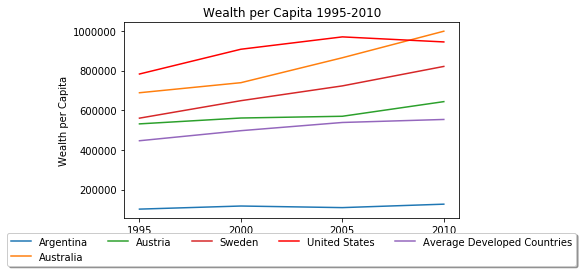

In [40]:
argentina = combined1_df.loc[combined1_df["country"] == "Argentina"]
date_x = argentina["date"]
temp_z = argentina["Wealth per Capita"]
mylabel = "Argentina"
plt.plot(date_x, temp_z, label=mylabel)

australia = combined1_df.loc[combined1_df["country"] == "Australia"]
date_x = australia["date"]
temp_z = australia["Wealth per Capita"]
mylabel = "Australia"
plt.plot(date_x, temp_z, label=mylabel)

austria = combined1_df.loc[combined1_df["country"] == "Austria"]
date_x = austria["date"]
temp_z = austria["Wealth per Capita"]
mylabel = "Austria"
plt.plot(date_x, temp_z, label=mylabel)

sweden = combined1_df.loc[combined1_df["country"] == "Sweden"]
date_x = sweden["date"]
temp_z = sweden["Wealth per Capita"]
mylabel = "Sweden"
plt.plot(date_x, temp_z, label=mylabel)

usa = combined1_df.loc[combined1_df["country"] == "United States"]
date_x = usa["date"]
temp_z = usa["Wealth per Capita"]
mylabel = "United States"
plt.plot(date_x, temp_z, color= 'red', label=mylabel)

world_temp= combined1_df.groupby(["date"]).mean()
world_temp = world_temp.reset_index()
date_x = world_temp['date']
temp_z = world_temp["Wealth per Capita"]
mylabel = "Average Developed Countries"
plt.plot(date_x, temp_z, label=mylabel)


#plt.legend(loc="best")
#fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.savefig("temp.png")
plt.title("Wealth per Capita 1995-2010")
plt.xlabel("Years")
plt.ylabel("Wealth per Capita")
plt.show()

In [63]:
combined1_by_country = combined1_df.set_index(["country"])
combined1_by_country.head()


date  Temperture in C  Natural Capital  \
country                                             
Argentina  1995        14.012433     3.568115e+11   
Argentina  2000        13.560453     3.882977e+11   
Argentina  2005        14.040006     6.468200e+11   
Argentina  2010        14.451981     7.516620e+11   
Australia  1995        21.480915     1.798999e+12   

           Agricutural Land per Capital  Wealth per Capita  
country                                                     
Argentina                   5758.312255      101364.379755  
Argentina                   5810.929061      116973.340999  
Argentina                   9950.871248      108954.015777  
Argentina                   9980.751465      126328.788468  
Australia                  14840.028438      688270.627163

In [64]:
#for c in combined1_by_country:
#    date_x = combined1_by_country["date"]
#    temp_z= combined1_by_country["Temperture in C"]
#    plt.title("Changing in Temperature 1995-2010")
#    plt.xlabel("Years")
#    plt.ylabel("Temperature in Celsius")
#    plt.plot(date_x, temp_z,label= c)
    
#ax = plt.subplot(111)
#box = ax.get_position()
#ax.set_position([box.x0, box.y0 + box.height * 0.1,
 #                box.width, box.height * 0.9])
##ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#          fancybox=True, shadow=True, ncol=c)
#plt.savefig("temp.png")    

#plt.show()

In [19]:
plt.scatter(combined1_df['country', 'Natural Capital', 'Temperture in C'], marker="o", facecolors="red", edgecolors="black")

KeyError: ('country', 'Natural Capital', 'Temperture in C')

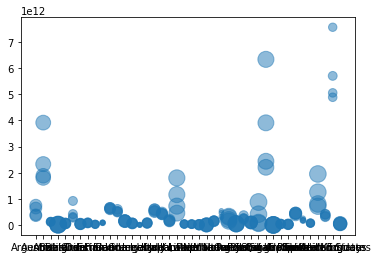

In [23]:
plt.scatter(combined1_df['country'], combined1_df['Natural Capital'], s = combined1_df['Temperture in C']*10, alpha=0.5)
plt.show()            
            #marker="o", facecolors="red", edgecolors="black")
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#xs = combined1_df['date'][s = combined1_df['Temperture in C']
#zs = combined1_df['Natural Capital']
#ax.scatter(xs, ys, zs, c='r', marker='o')

#ax.set_xlabel('Date')
#ax.set_ylabel('Temperture in C')
#ax.set_zlabel('Natural Capital')

plt.show()

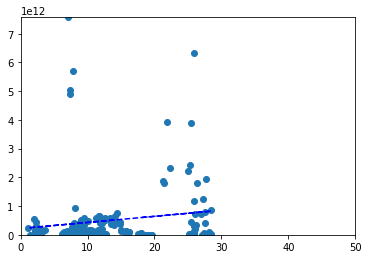

0.06062460108149601


In [56]:
(slope, intercept, r_value, p_value, std_err) = linregress(combined1_df['Temperture in C'], combined1_df['Natural Capital'])
fit = slope * combined1_df['Temperture in C'] + intercept
fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.set_ylim(min(combined1_df['Natural Capital']), max(combined1_df['Natural Capital']))
ax.plot(combined1_df['Temperture in C'], combined1_df['Natural Capital'], linewidth=0, marker='o')
ax.plot(combined1_df['Temperture in C'], fit, 'b--')
plt.show()
print(p_value)

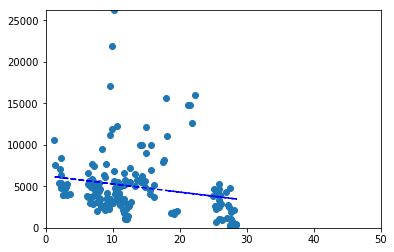

0.009984772801567638


In [58]:
(slope, intercept, r_value, p_value, std_err) = linregress(combined1_df['Temperture in C'], combined1_df["Agricutural Land per Capital"])
fit = slope * combined1_df['Temperture in C'] + intercept
fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.set_ylim(min(combined1_df["Agricutural Land per Capital"]), max(combined1_df["Agricutural Land per Capital"]))
ax.plot(combined1_df['Temperture in C'], combined1_df["Agricutural Land per Capital"], linewidth=0, marker='o')
ax.plot(combined1_df['Temperture in C'], fit, 'b--')
plt.show()
print(p_value)

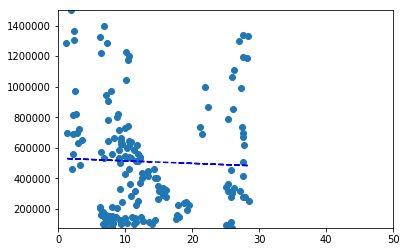

0.6421833712227446


In [59]:
(slope, intercept, r_value, p_value, std_err) = linregress(combined1_df['Temperture in C'], combined1_df["Wealth per Capita"])
fit = slope * combined1_df['Temperture in C'] + intercept
fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.set_ylim(min(combined1_df["Wealth per Capita"]), max(combined1_df["Wealth per Capita"]))
ax.plot(combined1_df['Temperture in C'], combined1_df["Wealth per Capita"], linewidth=0, marker='o')
ax.plot(combined1_df['Temperture in C'], fit, 'b--')
plt.show()
print(p_value)